# Introduction to GLOBE Data
We will examine two GLOBE datasets: [Mosquito Habitat Mapper](https://observer.globe.gov/do-globe-observer/mosquito-habitats) and [Land Cover](https://observer.globe.gov/do-globe-observer/land-cover).

You can view an [interactive dashboard of this data](https://experience.arcgis.com/experience/15c3e38176ec44d1a2f250c218343b4b).

To run the code right here in this tab, click the rocket ship icon ({fa}`rocket`) and choose {fa}`caret-right` **Live Code**.

```{admonition} Alternatively, use Google Colab
:class: dropdown
You can run the following code using Google Colab, which runs on your browser (no installations required). Click the rocket ship icon ({fa}`rocket`) and choose Colab.
```

First, we'll load the Python packages, which gives us more options with our code.

In [ ]:
import pandas as pd                           # For working with data
pd.set_option("display.max_columns", None)    # Lets us see all columns of the data instead of just a preview
import geopandas as gpd                       # For working with spatial data
import numpy as np                            # For working with numbers
import matplotlib.pyplot as plt               # For making graphs
from datetime import date                     # For formatting dates
from IPython.display import Image             # For displaying images

In [ ]:
end_date = "2024-12-31"

## Mosquito Habitat Mapper

Let's use the [GLOBE API](https://www.globe.gov/globe-data/globe-api), which allows us to get data directly without needing to download anything.

In [ ]:
data = gpd.read_file(f"https://api.globe.gov/search/v1/measurement/?protocols=mosquito_habitat_mapper&datefield=measuredDate&startdate=2018-01-01&enddate={end_date}&geojson=TRUE&sample=FALSE")

If you get an error `NameError: name 'gpd' is not defined`, go to the top of this notebook and click the arrow next to the first code block starting with `import geopandas as gpd`. This will install the packages needed for the rest of the code.

View the first 10 rows of the data, which are the most recently collected entries submitted to the GLOBE Observer App.

In [ ]:
data.head(10)

,countryCode,countryName,elevation,mosquitohabitatmapperAbdomenCloseupPhotoUrls,mosquitohabitatmapperBreedingGroundEliminated,mosquitohabitatmapperComments,mosquitohabitatmapperDataSource,mosquitohabitatmapperExtraData,mosquitohabitatmapperGenus,mosquitohabitatmapperGlobeTeams,mosquitohabitatmapperLarvaFullBodyPhotoUrls,mosquitohabitatmapperLarvaeCount,mosquitohabitatmapperLastIdentifyStage,mosquitohabitatmapperLocationAccuracyM,mosquitohabitatmapperLocationMethod,mosquitohabitatmapperMeasuredAt,mosquitohabitatmapperMeasurementElevation,mosquitohabitatmapperMeasurementLatitude,mosquitohabitatmapperMeasurementLongitude,mosquitohabitatmapperMosquitoAdults,mosquitohabitatmapperMosquitoEggCount,mosquitohabitatmapperMosquitoEggs,mosquitohabitatmapperMosquitoHabitatMapperId,mosquitohabitatmapperMosquitoPupae,mosquitohabitatmapperSpecies,mosquitohabitatmapperUserid,mosquitohabitatmapperWaterSource,mosquitohabitatmapperWaterSourcePhotoUrls,mosquitohabitatmapperWaterSourceType,organizationId,organizationName,protocol,siteId,siteName,geometry
0,BRA,Brazil,6.3,null,false,null,GLOBE Observer App,LarvaeVisibleNo,null,[COLUNSLZ],null,0,null,13,automatic,2024-12-31 17:16:00,0,-2.5617,-44.2657,null,null,null,46287,false,null,137422629,ovitrap,https://data.globe.gov/system/photos/2024/12/3...,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,371514,23MNT816168,POINT (-44.26597 -2.56197)
1,BRA,Brazil,6.3,null,false,null,GLOBE Observer App,LarvaeVisibleNo,null,[COLUNSLZ],null,0,null,13,automatic,2024-12-31 17:20:00,0,-2.5617,-44.2657,null,null,null,46290,false,null,137422629,ovitrap,https://data.globe.gov/system/photos/2024/12/3...,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,371514,23MNT816168,POINT (-44.26597 -2.56197)
2,BRA,Brazil,7.4,null,true,null,GLOBE Observer App,LarvaeVisibleNo,null,[COLUNSLZ],null,0,null,51,automatic,2024-12-31 22:32:00,0,-2.5163,-44.3023,null,null,null,46482,false,null,137420190,"cement, metal or plastic tank",null,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,372864,23MNT775218,POINT (-44.30288 -2.51676)
3,BRA,Brazil,20.6,null,true,null,GLOBE Observer App,LarvaeVisibleNo,null,[COLUNSLZ],null,0,null,66,automatic,2024-12-31 00:05:00,0,-2.8639,-44.0549,null,null,null,46203,false,null,137419937,can or bottle,null,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396)
4,BRA,Brazil,20.6,null,true,null,GLOBE Observer App,LarvaeVisibleNo,null,[COLUNSLZ],null,0,null,28,automatic,2024-12-31 00:23:00,0,-2.8639,-44.055,null,null,null,46223,false,null,137419937,lake,null,still: lake/pond/swamp,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396)
5,BRA,Brazil,20.6,null,true,null,GLOBE Observer App,LarvaeVisibleNo,null,[COLUNSLZ],null,0,null,19,automatic,2024-12-31 00:26:00,0,-2.8639,-44.055,null,null,null,46230,false,null,137419937,"plant husk (areca, coconut etc)",null,container: natural,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396)
6,BRA,Brazil,20.6,null,true,null,GLOBE Observer App,LarvaeVisibleNo,null,[COLUNSLZ],null,0,null,98,automatic,2024-12-31 00:31:00,0,-2.8638,-44.0548,null,null,null,46234,false,null,137419937,lake,null,still: lake/pond/swamp,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396)
7,BRA,Brazil,20.6,null,true,null,GLOBE Observer App,LarvaeVisibleNo,null,[COLUNSLZ],null,0,null,98,automatic,2024-12-31 00:42:00,0,-2.8638,-44.0552,null,null,null,46261,false,null,137419937,plant clumps (bamboo etc),null,container: natural,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396)
8,BRA,Brazil,20.6,null,true,null,GLOBE Observer App,LarvaeVisibleNo,null,[COLUNSLZ],null,0,null,100,automatic,2024-12-31 00:46:00,0,-2.8639,-44.0552,null,null,null,46264,false,null,137

Let's use the `info()` function to learn more about what the dataset contains.

In [ ]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43342 entries, 0 to 43341
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   countryCode                                    43256 non-null  object        
 1   countryName                                    43256 non-null  object        
 2   elevation                                      43342 non-null  object        
 3   mosquitohabitatmapperAbdomenCloseupPhotoUrls   43342 non-null  object        
 4   mosquitohabitatmapperBreedingGroundEliminated  43342 non-null  object        
 5   mosquitohabitatmapperComments                  43342 non-null  object        
 6   mosquitohabitatmapperDataSource                43342 non-null  object        
 7   mosquitohabitatmapperExtraData                 43342 non-null  object        
 8   mosquitohabitatmapperGenus                     4

We see information about each column, how many non-null rows there are (non-null means not missing), and the type (a dtype of "object" means it is text). We see that we also have a `datetime` column, which would be great for analyzing the data over time. The `geometry` column gives us information about where the citizen scientist collected the data about mosquitoes.

However, there are some columns that are currently stored as an "object" when we want then to be stored as a "float" (decimal) or "int" (whole number). Also, for some rows, if the value is missing, there is the word "null," which can be confused as an actual value. We'll replace this with NAN, which Python reads as empty rather than an object.

Note: The column 'mosquitohabitatmapperLarvaeCount' stores numbers in addition to ranges like 1-25. However, we need to simplify these ranges to a single number to make them easier to store in the dataset and more consistent. So, if there is a range, we will replace it with the lower value of the range.

In [ ]:
# Let's remove the "mosquitomapper" in front of all the column names to make it easier to see the names
new_column_names = data.columns.str.replace("mosquitohabitatmapper", "")

# Make the first letter of each column name capitalized (for consistency)
new_column_names = [name[0].upper() + name[1:] for name in new_column_names]

data.columns = new_column_names
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43342 entries, 0 to 43341
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CountryCode               43256 non-null  object        
 1   CountryName               43256 non-null  object        
 2   Elevation                 43342 non-null  object        
 3   AbdomenCloseupPhotoUrls   43342 non-null  object        
 4   BreedingGroundEliminated  43342 non-null  object        
 5   Comments                  43342 non-null  object        
 6   DataSource                43342 non-null  object        
 7   ExtraData                 43342 non-null  object        
 8   Genus                     43342 non-null  object        
 9   GlobeTeams                16353 non-null  object        
 10  LarvaFullBodyPhotoUrls    43342 non-null  object        
 11  LarvaeCount               43342 non-null  object        
 12  LastIdenti

In [ ]:
# Add new column for date, not including the time
data['MeasuredDate'] = data['MeasuredAt'].dt.date

In [ ]:
# The LarvaeCount column has some grouped entries like '1-25' that we will replace with the center value
data['LarvaeCountProcessed'] = data['LarvaeCount'].replace({
    '1-25': 13,
    '26-50': 38,
    '51-100': 76,
    'more than 100': 100,
    'null': np.nan
})

# If the LarvaeCount is very long (more than 10 characters), then it is likely an error, so we'll replace with null
data.loc[data['LarvaeCountProcessed'].str.len() > 10, 'LarvaeCountProcessed'] = np.nan

numeric_cols = ['LarvaeCountProcessed', 'MeasurementLatitude', 'MeasurementLongitude']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric)

# Drop the MosquitoEggCount column because it is all null
data = data.drop(columns=['MosquitoEggCount'])

# Replace the word 'null' with NA to ensure it is stored as an empty value instead of a word
data = data.replace('null', np.nan)

data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43342 entries, 0 to 43341
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CountryCode               43256 non-null  object        
 1   CountryName               43256 non-null  object        
 2   Elevation                 43342 non-null  object        
 3   AbdomenCloseupPhotoUrls   886 non-null    object        
 4   BreedingGroundEliminated  43281 non-null  object        
 5   Comments                  4039 non-null   object        
 6   DataSource                43342 non-null  object        
 7   ExtraData                 12518 non-null  object        
 8   Genus                     4402 non-null   object        
 9   GlobeTeams                16353 non-null  object        
 10  LarvaFullBodyPhotoUrls    8697 non-null   object        
 11  LarvaeCount               24895 non-null  object        
 12  LastIdenti

In [ ]:
data.head(10)

,CountryCode,CountryName,Elevation,AbdomenCloseupPhotoUrls,BreedingGroundEliminated,Comments,DataSource,ExtraData,Genus,GlobeTeams,LarvaFullBodyPhotoUrls,LarvaeCount,LastIdentifyStage,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MosquitoAdults,MosquitoEggs,MosquitoHabitatMapperId,MosquitoPupae,Species,Userid,WaterSource,WaterSourcePhotoUrls,WaterSourceType,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,Geometry,MeasuredDate,LarvaeCountProcessed
0,BRA,Brazil,6.3,NaN,false,NaN,GLOBE Observer App,LarvaeVisibleNo,NaN,[COLUNSLZ],NaN,0,NaN,13,automatic,2024-12-31 17:16:00,0,-2.5617,-44.2657,NaN,NaN,46287,false,NaN,137422629,ovitrap,https://data.globe.gov/system/photos/2024/12/3...,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,371514,23MNT816168,POINT (-44.26597 -2.56197),2024-12-31,0.0
1,BRA,Brazil,6.3,NaN,false,NaN,GLOBE Observer App,LarvaeVisibleNo,NaN,[COLUNSLZ],NaN,0,NaN,13,automatic,2024-12-31 17:20:00,0,-2.5617,-44.2657,NaN,NaN,46290,false,NaN,137422629,ovitrap,https://data.globe.gov/system/photos/2024/12/3...,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,371514,23MNT816168,POINT (-44.26597 -2.56197),2024-12-31,0.0
2,BRA,Brazil,7.4,NaN,true,NaN,GLOBE Observer App,LarvaeVisibleNo,NaN,[COLUNSLZ],NaN,0,NaN,51,automatic,2024-12-31 22:32:00,0,-2.5163,-44.3023,NaN,NaN,46482,false,NaN,137420190,"cement, metal or plastic tank",NaN,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,372864,23MNT775218,POINT (-44.30288 -2.51676),2024-12-31,0.0
3,BRA,Brazil,20.6,NaN,true,NaN,GLOBE Observer App,LarvaeVisibleNo,NaN,[COLUNSLZ],NaN,0,NaN,66,automatic,2024-12-31 00:05:00,0,-2.8639,-44.0549,NaN,NaN,46203,false,NaN,137419937,can or bottle,NaN,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396),2024-12-31,0.0
4,BRA,Brazil,20.6,NaN,true,NaN,GLOBE Observer App,LarvaeVisibleNo,NaN,[COLUNSLZ],NaN,0,NaN,28,automatic,2024-12-31 00:23:00,0,-2.8639,-44.0550,NaN,NaN,46223,false,NaN,137419937,lake,NaN,still: lake/pond/swamp,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396),2024-12-31,0.0
5,BRA,Brazil,20.6,NaN,true,NaN,GLOBE Observer App,LarvaeVisibleNo,NaN,[COLUNSLZ],NaN,0,NaN,19,automatic,2024-12-31 00:26:00,0,-2.8639,-44.0550,NaN,NaN,46230,false,NaN,137419937,"plant husk (areca, coconut etc)",NaN,container: natural,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396),2024-12-31,0.0
6,BRA,Brazil,20.6,NaN,true,NaN,GLOBE Observer App,LarvaeVisibleNo,NaN,[COLUNSLZ],NaN,0,NaN,98,automatic,2024-12-31 00:31:00,0,-2.8638,-44.0548,NaN,NaN,46234,false,NaN,137419937,lake,NaN,still: lake/pond/swamp,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396),2024-12-31,0.0
7,BRA,Brazil,20.6,NaN,true,NaN,GLOBE Observer App,LarvaeVisibleNo,NaN,[COLUNSLZ],NaN,0,NaN,98,automatic,2024-12-31 00:42:00,0,-2.8638,-44.0552,NaN,NaN,46261,false,NaN,137419937,plant clumps (bamboo etc),NaN,container: natural,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396),2024-12-31,0.0
8,BRA,Brazil,20.6,NaN,true,NaN,GLOBE Observer App,LarvaeVisibleNo,NaN,[COLUNSLZ],NaN,0,NaN,100,automatic,2024-12-31 00:46:00,0,-2.8639,-44.0552,NaN,NaN,46264,false,NaN,137419937,pond,NaN,still: lake/pond/swamp,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396),2024-12-31,0.0
9,BRA,Brazil,20.6,NaN,true,NaN,GLOBE Observer App,LarvaeVisibleNo,NaN,[COLUNSLZ],NaN,0,NaN,98,automatic,2024-12-31 00:48:00,0,-2.8638,-44.0552,NaN,NaN,46266,false,NaN,137419937,adult mosquito trap,NaN,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,POINT (-44.05526 -2.86396),2024-12-31,0.0


```{admonition} [Click to download the data](https://github.com/geo-di-lab/emerge-lessons/blob/main/docs/data/globe_mosquito.zip)
We will use these in future lessons!
```

### Explore the Data

Let's make a simple graph showing the number of contributions submitted by citizen scientists over time!

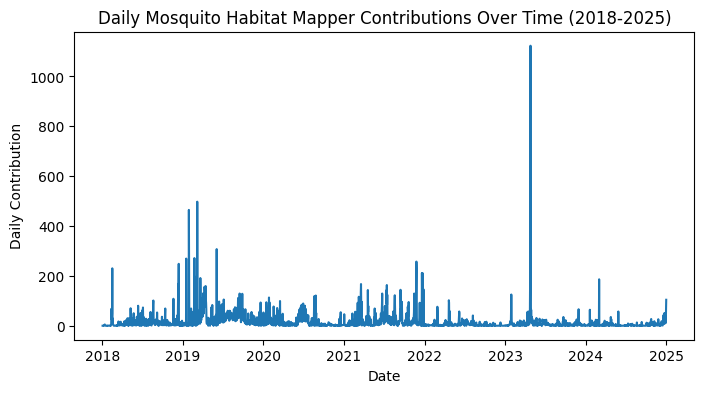

In [ ]:
data_by_day = data[['SiteId', 'MeasuredDate']].groupby(['MeasuredDate'], as_index=False).count()

plt.figure(figsize=(8,4))
plt.plot(data_by_day['MeasuredDate'], data_by_day['SiteId'])
plt.xlabel("Date")
plt.ylabel("Daily Contribution")
plt.title("Daily Mosquito Habitat Mapper Contributions Over Time (2018-2025)")
plt.show()

Let's plot the number of contributions by country:

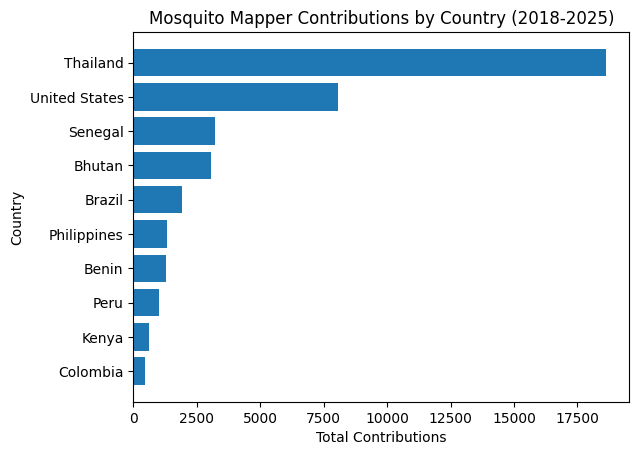

In [ ]:
data_by_county = data[['SiteId', 'CountryName']].groupby(['CountryName'], as_index=False).count().sort_values(by='SiteId').tail(10)

plt.barh(data_by_county['CountryName'], data_by_county['SiteId'])
plt.xlabel("Total Contributions")
plt.ylabel("Country")
plt.title("Mosquito Mapper Contributions by Country (2018-2025)")
plt.show()

## Land Cover

Now, we'll review the Land Cover dataset. In a similar way, we'll get the data from the GLOBE API using the same date range from the Mosquito dataset.

In [ ]:
data = gpd.read_file(f"https://api.globe.gov/search/v1/measurement/?protocols=land_covers&datefield=measuredDate&startdate=2018-01-01&enddate={end_date}&geojson=TRUE&sample=FALSE")

View a list of the columns in the dataset:

In [ ]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52020 entries, 0 to 52019
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   countryCode                     49613 non-null  object        
 1   countryName                     49613 non-null  object        
 2   elevation                       52020 non-null  object        
 3   landcoversDataSource            52020 non-null  object        
 4   landcoversDownwardCaption       52020 non-null  object        
 5   landcoversDownwardExtraData     52020 non-null  object        
 6   landcoversDownwardPhotoUrl      52020 non-null  object        
 7   landcoversDryGround             52020 non-null  object        
 8   landcoversEastCaption           52020 non-null  object        
 9   landcoversEastClassifications   52020 non-null  object        
 10  landcoversEastExtraData         52020 non-null  object        

In [ ]:
# Let's remove the "landcovers" in front of all the column names to make it easier to see the names
new_column_names = data.columns.str.replace("landcovers", "")

# Make the first letter of each column name capitalized (for consistency)
new_column_names = [name[0].upper() + name[1:] for name in new_column_names]

data.columns = new_column_names
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52020 entries, 0 to 52019
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CountryCode           49613 non-null  object        
 1   CountryName           49613 non-null  object        
 2   Elevation             52020 non-null  object        
 3   DataSource            52020 non-null  object        
 4   DownwardCaption       52020 non-null  object        
 5   DownwardExtraData     52020 non-null  object        
 6   DownwardPhotoUrl      52020 non-null  object        
 7   DryGround             52020 non-null  object        
 8   EastCaption           52020 non-null  object        
 9   EastClassifications   52020 non-null  object        
 10  EastExtraData         52020 non-null  object        
 11  EastPhotoUrl          52020 non-null  object        
 12  Feature1Caption       52020 non-null  object        
 13  Feature1

In [ ]:
# Add new column for date
data['MeasuredDate'] = data['MeasuredAt'].dt.date

data.head(10)

,CountryCode,CountryName,Elevation,DataSource,DownwardCaption,DownwardExtraData,DownwardPhotoUrl,DryGround,EastCaption,EastClassifications,EastExtraData,EastPhotoUrl,Feature1Caption,Feature1ExtraData,Feature1PhotoUrl,Feature2Caption,Feature2ExtraData,Feature2PhotoUrl,Feature3Caption,Feature3ExtraData,Feature3PhotoUrl,Feature4Caption,Feature4ExtraData,Feature4PhotoUrl,FieldNotes,GlobeTeams,LandCoverId,LeavesOnTrees,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MucCode,MucDescription,MucDetails,Muddy,NorthCaption,NorthClassifications,NorthExtraData,NorthPhotoUrl,RainingSnowing,SnowIce,SouthCaption,SouthClassifications,SouthExtraData,SouthPhotoUrl,StandingWater,UpwardCaption,UpwardExtraData,UpwardPhotoUrl,Userid,WestCaption,WestClassifications,WestExtraData,WestPhotoUrl,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,Geometry,MeasuredDate
0,ITA,Italy,489.2,GLOBE Observer App,null,null,https://data.globe.gov/system/photos/2024/12/3...,true,null,null,null,https://data.globe.gov/system/photos/2024/12/3...,"Snag C. sativa, 40 cm, cl 2, #01 #04 #12","((compassData.heading: 182, compassData.horizo...",https://data.globe.gov/system/photos/2024/12/3...,"Log 70 cm, C. sativa, cl 2, #04 #01 #12","((compassData.heading: 182, compassData.horizo...",https://data.globe.gov/system/photos/2024/12/3...,Stump of C. sativa 230 cm,"((compassData.heading: null, compassData.horiz...",https://data.globe.gov/system/photos/2024/12/3...,null,null,null,Old Coppice of Castanea sativa,[Conservazione Natura Universita Tuscia],78608,false,8,automatic,2024-12-31 15:07:00.000,492.4,42.1818,12.1825,null,null,,false,null,null,null,https://data.globe.gov/system/photos/2024/12/3...,false,false,null,null,null,https://data.globe.gov/system/photos/2024/12/3...,false,null,null,https://data.globe.gov/system/photos/2024/12/3...,128342138,null,null,null,https://data.globe.gov/system/photos/2024/12/3...,17453129,Italy Citizen Science,land_covers,376869,33TTG673738,POINT (12.18229 42.18175),2024-12-31
1,MDG,Madagascar,1350.1,GLOBE Observer App,null,null,https://data.globe.gov/system/photos/2024/12/3...,true,null,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",null,https://data.globe.gov/system/photos/2024/12/3...,null,null,null,null,null,null,null,null,null,null,null,null,Arbres plantés par l'équipe GLOBE avec la comm...,"[Africa 2024 Regional Meeting, Coordinating Of...",77695,true,10,automatic,2024-12-31 11:29:00.000,1340.6,-18.7576,47.5615,M01,"Trees, Closely Spaced, Evergreen - Needle Leaved",n,false,null,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",null,https://data.globe.gov/system/photos/2024/12/3...,false,false,null,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",null,https://data.globe.gov/system/photos/2024/12/3...,false,null,null,https://data.globe.gov/system/photos/2024/12/3...,2538037,null,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",null,https://data.globe.gov/system/photos/2024/12/3...,6508873,Madagascar GLOBE v-School,land_covers,373647,38KQE700240,POINT (47.56096 -18.75807),2024-12-31
2,MDG,Madagascar,1324.7,GLOBE Observer App,null,null,https://data.globe.gov/system/photos/2024/12/3...,true,null,"60% MUC 93 [Urban, Roads and Parking]",null,https://data.globe.gov/system/photos/2024/12/3...,null,null,null,null,null,null,null,null,null,null,null,null,(none),"[Africa 2024 Regional Meeting, Coordinating Of...",77691,true,10,automatic,2024-12-31 12:07:00.000,1324.8,-18.7944,47.5799,M93,"Urban, Roads and Parking",,false,null,"60% MUC 93 [Urban, Roads and Parking]",null,https://data.globe.gov/system/photos/2024/12/3...,false,false,null,"60% MUC 93 [Urban, Roads and Parking]",null,https://data.globe.gov/system/photos/2024/12/3...,false,null,null,https://data.globe.gov/system/photos/2024/12/3...,2538037,null,"60% MUC 93 [Urban, Roads and Parking]",null,https://data.globe.gov/system/photos/2024/12/3...,6508873,Madagascar GLOBE v-School,land_covers,373642,38KQE719199,POINT (47.579

Replace null values:

In [ ]:
data['FieldNotes'] = data['FieldNotes'].replace('(none)', np.nan)
data = data.replace('null', np.nan)

In [ ]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52020 entries, 0 to 52019
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CountryCode           49613 non-null  object        
 1   CountryName           49613 non-null  object        
 2   Elevation             52020 non-null  object        
 3   DataSource            52020 non-null  object        
 4   DownwardCaption       22648 non-null  object        
 5   DownwardExtraData     22644 non-null  object        
 6   DownwardPhotoUrl      40037 non-null  object        
 7   DryGround             43955 non-null  object        
 8   EastCaption           23889 non-null  object        
 9   EastClassifications   14465 non-null  object        
 10  EastExtraData         23884 non-null  object        
 11  EastPhotoUrl          42893 non-null  object        
 12  Feature1Caption       341 non-null    object        
 13  Feature1

In [ ]:
data.head()

,CountryCode,CountryName,Elevation,DataSource,DownwardCaption,DownwardExtraData,DownwardPhotoUrl,DryGround,EastCaption,EastClassifications,EastExtraData,EastPhotoUrl,Feature1Caption,Feature1ExtraData,Feature1PhotoUrl,Feature2Caption,Feature2ExtraData,Feature2PhotoUrl,Feature3Caption,Feature3ExtraData,Feature3PhotoUrl,Feature4Caption,Feature4ExtraData,Feature4PhotoUrl,FieldNotes,GlobeTeams,LandCoverId,LeavesOnTrees,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MucCode,MucDescription,MucDetails,Muddy,NorthCaption,NorthClassifications,NorthExtraData,NorthPhotoUrl,RainingSnowing,SnowIce,SouthCaption,SouthClassifications,SouthExtraData,SouthPhotoUrl,StandingWater,UpwardCaption,UpwardExtraData,UpwardPhotoUrl,Userid,WestCaption,WestClassifications,WestExtraData,WestPhotoUrl,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,Geometry,MeasuredDate
0,ITA,Italy,489.2,GLOBE Observer App,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,true,NaN,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,"Snag C. sativa, 40 cm, cl 2, #01 #04 #12","((compassData.heading: 182, compassData.horizo...",https://data.globe.gov/system/photos/2024/12/3...,"Log 70 cm, C. sativa, cl 2, #04 #01 #12","((compassData.heading: 182, compassData.horizo...",https://data.globe.gov/system/photos/2024/12/3...,Stump of C. sativa 230 cm,"((compassData.heading: null, compassData.horiz...",https://data.globe.gov/system/photos/2024/12/3...,NaN,NaN,NaN,Old Coppice of Castanea sativa,[Conservazione Natura Universita Tuscia],78608,false,8,automatic,2024-12-31 15:07:00.000,492.4,42.1818,12.1825,NaN,NaN,,false,NaN,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,false,false,NaN,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,false,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,128342138,NaN,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,17453129,Italy Citizen Science,land_covers,376869,33TTG673738,POINT (12.18229 42.18175),2024-12-31
1,MDG,Madagascar,1350.1,GLOBE Observer App,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,true,NaN,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",NaN,https://data.globe.gov/system/photos/2024/12/3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arbres plantés par l'équipe GLOBE avec la comm...,"[Africa 2024 Regional Meeting, Coordinating Of...",77695,true,10,automatic,2024-12-31 11:29:00.000,1340.6,-18.7576,47.5615,M01,"Trees, Closely Spaced, Evergreen - Needle Leaved",n,false,NaN,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",NaN,https://data.globe.gov/system/photos/2024/12/3...,false,false,NaN,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",NaN,https://data.globe.gov/system/photos/2024/12/3...,false,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,2538037,NaN,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",NaN,https://data.globe.gov/system/photos/2024/12/3...,6508873,Madagascar GLOBE v-School,land_covers,373647,38KQE700240,POINT (47.56096 -18.75807),2024-12-31
2,MDG,Madagascar,1324.7,GLOBE Observer App,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,true,NaN,"60% MUC 93 [Urban, Roads and Parking]",NaN,https://data.globe.gov/system/photos/2024/12/3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Africa 2024 Regional Meeting, Coordinating Of...",77691,true,10,automatic,2024-12-31 12:07:00.000,1324.8,-18.7944,47.5799,M93,"Urban, Roads and Parking",,false,NaN,"60% MUC 93 [Urban, Roads and Parking]",NaN,https://data.globe.gov/system/photos/2024/12/3...,false,false,NaN,"60% MUC 93 [Urban, Roads and Parking]",NaN,https://data.globe.gov/system/photos/2024/12/3...,false,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,2538037,NaN,"60% MUC 93 [Urban, Roads and Parking]",NaN,https://data.globe.gov/system/photos/2024/12/3...,6508873,Madagascar GLOBE v-School,land_covers,373642,38KQE719199,POINT (47.57953 -18.79484),2024-12-31
3,USA,United States,182.2,GLOBE Data Entry Site

```{admonition} [Click to download the data](https://github.com/geo-di-lab/emerge-lessons/blob/main/docs/data/globe_land_cover.zip)
We will use these in future lessons!
```

### Explore the Data

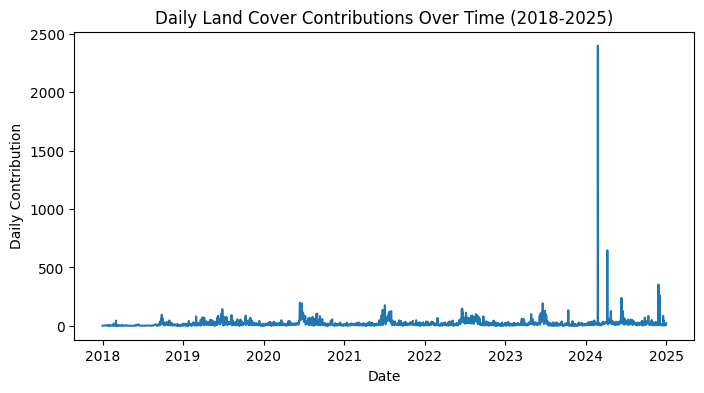

In [ ]:
data_by_day = data[['SiteId', 'MeasuredDate']].groupby(['MeasuredDate'], as_index=False).count()

plt.figure(figsize=(8,4))
plt.plot(data_by_day['MeasuredDate'], data_by_day['SiteId'])
plt.xlabel("Date")
plt.ylabel("Daily Contribution")
plt.title("Daily Land Cover Contributions Over Time (2018-2025)")
plt.show()

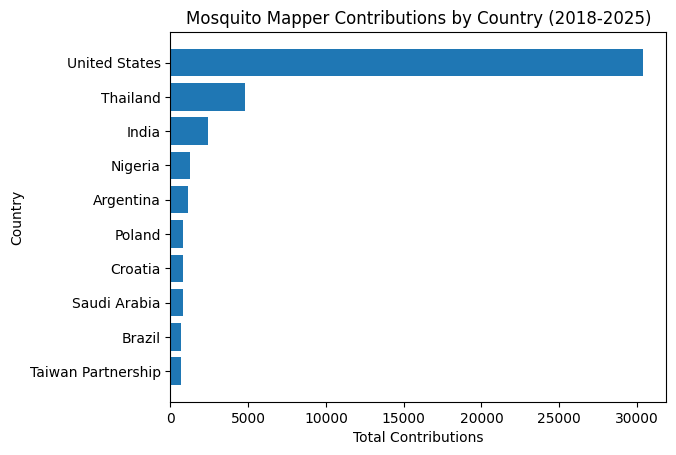

In [ ]:
data_by_county = data[['SiteId', 'CountryName']].groupby(['CountryName'], as_index=False).count().sort_values(by='SiteId').tail(10)

plt.barh(data_by_county['CountryName'], data_by_county['SiteId'])
plt.xlabel("Total Contributions")
plt.ylabel("Country")
plt.title("Mosquito Mapper Contributions by Country (2018-2025)")
plt.show()

A powerful feature of the Land Cover dataset is that users submit pictures of the area. Let's view some these images.

In [ ]:
entry = data.dropna(subset=['DownwardPhotoUrl', 'EastPhotoUrl', 'NorthPhotoUrl', 'SouthPhotoUrl', 'WestPhotoUrl', 'UpwardPhotoUrl',
                            'Feature1PhotoUrl', 'Feature2PhotoUrl', 'Feature3PhotoUrl', 'Feature4PhotoUrl']).head(1)

url_list = []

for col in entry.columns:
  if 'Url' in col:
    print(f'{col}: {entry[col].values[0]}')
    url_list.append(entry[col].values[0])

display(entry)

DownwardPhotoUrl: https://data.globe.gov/system/photos/2024/12/31/4325699/original.jpg
EastPhotoUrl: https://data.globe.gov/system/photos/2024/12/31/4325695/original.jpg
Feature1PhotoUrl: https://data.globe.gov/system/photos/2024/12/31/4325700/original.jpg
Feature2PhotoUrl: https://data.globe.gov/system/photos/2024/12/31/4325701/original.jpg
Feature3PhotoUrl: https://data.globe.gov/system/photos/2024/12/31/4325702/original.jpg
Feature4PhotoUrl: https://data.globe.gov/system/photos/2024/12/31/4325703/original.jpg
NorthPhotoUrl: https://data.globe.gov/system/photos/2024/12/31/4325694/original.jpg
SouthPhotoUrl: https://data.globe.gov/system/photos/2024/12/31/4325696/original.jpg
UpwardPhotoUrl: https://data.globe.gov/system/photos/2024/12/31/4325698/original.jpg
WestPhotoUrl: https://data.globe.gov/system/photos/2024/12/31/4325697/original.jpg


,CountryCode,CountryName,Elevation,DataSource,DownwardCaption,DownwardExtraData,DownwardPhotoUrl,DryGround,EastCaption,EastClassifications,EastExtraData,EastPhotoUrl,Feature1Caption,Feature1ExtraData,Feature1PhotoUrl,Feature2Caption,Feature2ExtraData,Feature2PhotoUrl,Feature3Caption,Feature3ExtraData,Feature3PhotoUrl,Feature4Caption,Feature4ExtraData,Feature4PhotoUrl,FieldNotes,GlobeTeams,LandCoverId,LeavesOnTrees,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MucCode,MucDescription,MucDetails,Muddy,NorthCaption,NorthClassifications,NorthExtraData,NorthPhotoUrl,RainingSnowing,SnowIce,SouthCaption,SouthClassifications,SouthExtraData,SouthPhotoUrl,StandingWater,UpwardCaption,UpwardExtraData,UpwardPhotoUrl,Userid,WestCaption,WestClassifications,WestExtraData,WestPhotoUrl,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,Geometry,MeasuredDate
11,ITA,Italy,1076.2,GLOBE Observer App,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,false,NaN,"90% MUC 12 (b) [Trees, Loosely Spaced, Deciduo...",NaN,https://data.globe.gov/system/photos/2024/12/3...,NaN,"((compassData.heading: 328, compassData.horizo...",https://data.globe.gov/system/photos/2024/12/3...,NaN,"((compassData.heading: 68, compassData.horizon...",https://data.globe.gov/system/photos/2024/12/3...,NaN,"((compassData.heading: 80, compassData.horizon...",https://data.globe.gov/system/photos/2024/12/3...,NaN,"((compassData.heading: 118, compassData.horizo...",https://data.globe.gov/system/photos/2024/12/3...,Buca in fustaia coetanea di faggio a dominanza...,[Conservazione Natura Universita Tuscia],78265,false,4,automatic,2024-12-31 10:47:00,1062.4,41.7648,14.2258,M12,"Trees, Loosely Spaced, Deciduous - Broad Leaved",b,false,NaN,"90% MUC 12 (b) [Trees, Loosely Spaced, Deciduo...",NaN,https://data.globe.gov/system/photos/2024/12/3...,false,true,NaN,"90% MUC 12 (b) [Trees, Loosely Spaced, Deciduo...",NaN,https://data.globe.gov/system/photos/2024/12/3...,false,NaN,NaN,https://data.globe.gov/system/photos/2024/12/3...,140413632,NaN,"90% MUC 12 (b) [Trees, Loosely Spaced, Deciduo...",NaN,https://data.globe.gov/system/photos/2024/12/3...,17453129,Italy Citizen Science,land_covers,375492,33TVG356239,POINT (14.22524 41.76432),2024-12-31


In [ ]:
Image(url='https://data.globe.gov/system/photos/2024/12/31/4325699/original.jpg')

In [ ]:
url_list

['https://data.globe.gov/system/photos/2024/12/31/4325699/original.jpg',
 'https://data.globe.gov/system/photos/2024/12/31/4325695/original.jpg',
 'https://data.globe.gov/system/photos/2024/12/31/4325700/original.jpg',
 'https://data.globe.gov/system/photos/2024/12/31/4325701/original.jpg',
 'https://data.globe.gov/system/photos/2024/12/31/4325702/original.jpg',
 'https://data.globe.gov/system/photos/2024/12/31/4325703/original.jpg',
 'https://data.globe.gov/system/photos/2024/12/31/4325694/original.jpg',
 'https://data.globe.gov/system/photos/2024/12/31/4325696/original.jpg',
 'https://data.globe.gov/system/photos/2024/12/31/4325698/original.jpg',
 'https://data.globe.gov/system/photos/2024/12/31/4325697/original.jpg']